# Worksheet 12

Name: Kian Boon Tan
UID: U93983891

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes. There are a distinct number of possibilities (true / false).
2. No. There are possibly an infinite number of months before a student is offered a job.
3. Yes. There are a distinct number of possibilities (1 - 5).
4. No. There is no distinct number of births that can occur in a specified minute.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Split the dataset into two portions: one to train the model on and one to test the model on. This allows the model to be tested on data which it has never seen.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

#### Underfitting
When the model is not specific enough to the type of data it is being trained on. One sign of this is when the model is failing at making accurate guesses after it has been trained.

#### Overfitting
When the model is learning too specific to its training data and does not generalize to other data of the same form. One sign of this is when the model makes accurate guesses on its training data but fails when presented with other data.

### K Nearest Neighbors

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

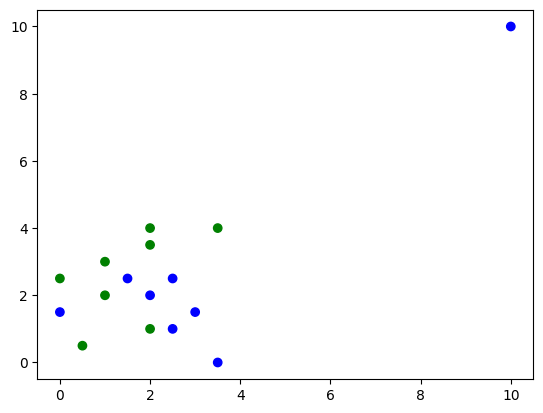

In [25]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

The point at `(10, 10)` could be an outlier, as it is clearly shown to be lying far outside the data cluster in the plot.

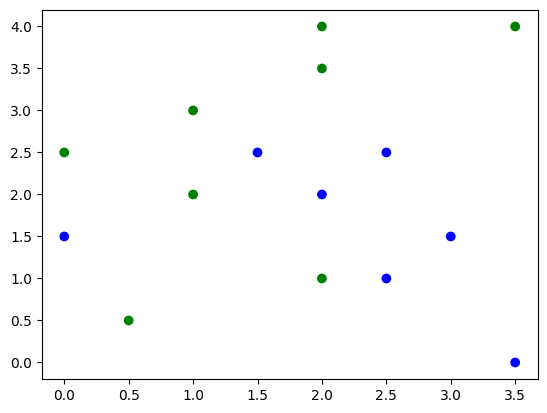

In [26]:
# Remove last data point.
data["Attribute A"].pop()
data["Attribute B"].pop()
data["Class"].pop()

# Plot our points again without the outlier.
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Class 0 appears to follow a downward sloping trend except for its point at `(0, 1.5)`. Similarly, class 1 appears to follow an upward sloping trend except for its points at `(0.5, 0.5)` and `(2.0, 1.0)`. Therefore, these points could be considered noise points in this dataset.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

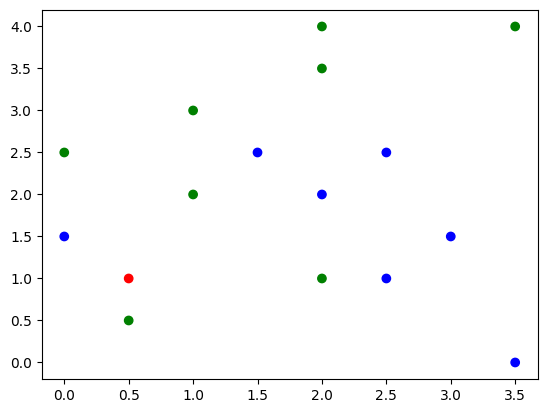

In [27]:
# Plot the mentioned point in a different color by adding it to the dataset.
# For simplicity use the third color available to us (class = 2).
data["Attribute A"].append(0.5)
data["Attribute B"].append(1)
data["Class"].append(2)

plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

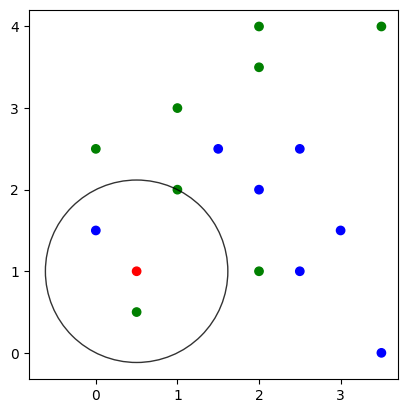

In [29]:
def euclidian_distance(p1, p2):
    """ calculates euclidian distance between two points.
        expects points in format (A, B)
    """
    return (abs(p1[0] - p2[0]) ** 2 + abs(p1[1] - p2[1]) ** 2) ** 0.5

def n_closest_to(example, n):
    """ example contains our data
        n specifies the point we are considering in format (A, B)
    """
    # Create a dictionary mapping points to their distances and distances to sort.
    distances = []
    distance_to_point = {}
    
    # Check against all points.
    for i in range(len(example["Attribute A"])):
        curr_point = (example["Attribute A"][i], example["Attribute B"][i])
        
        # Calculate euclidean distance.
        euclidian_dist = euclidian_distance(n, curr_point)
        
        # Disregard if 0 (same point).
        if euclidian_dist != 0:
            distances.append(euclidian_dist)
            distance_to_point[euclidian_dist] = curr_point
            
    # Sort and return closest n points.
    distances.sort()
    points = []
    
    for i in range(3):
        points.append(distance_to_point[distances[i]])
        
    return points

# Get 3 closest points and calculate distance for last (furthest distance).
furthest_dist = euclidian_distance(location, n_closest_to(data, (0.5, 1))[2])
    
location = (0.5,1)
radius = furthest_dist
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [30]:
def majority(points):
    # Convert data into a point (A, B) -> class mapping.
    classes = {}
    
    for i in range(len(data["Attribute A"])):
        classes[(data["Attribute A"][i], data["Attribute B"][i])] = data["Class"][i]
        
    # Figure out how many points are in each class.
    class_0 = 0
    class_1 = 0
    
    for point in points:
        if classes[point] == 0:
            class_0 += 1
        
        else:
            class_1 += 1
            
    # Return majority.
    if class_0 < class_1:
        return 1
    
    else:
        return 0

print(f"The class assigned is class {majority(n_closest_to(data, (0.5, 1)))}")

The class assigned is class 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [32]:
count = 0
for i in range(len(data["Attribute A"])):
    actual_class = data["Class"][i]
    
    # Our function already ignores the current point that we are considering.
    training_set = data
    
    current_point = (data["Attribute A"][i], data["Attribute B"][i])
    prediction = majority(n_closest_to(training_set, current_point))
    
    if prediction == actual_class:
        count += 1

# Length of the training set is the length of our set minus the point we are ignoring.
training_length = len(data["Attribute A"]) - 1
accuracy = count / training_length
print("overall accuracy = ", accuracy)

overall accuracy =  0.7333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Collect data from running on values of K.
k = [i for i in range(1, 21)]
training_acc = []
testing_acc = []

for i in k:
    print("Training ", i)
    # Train on a value of k.
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    
    print("Testing ", i)
    # Calculate accuracy for both training and testing set.
    training_acc.append(neigh.score(X_train, y_train))
    testing_acc.append(neigh.score(X_test, y_test))    

Training  1
Testing  1
Training  2
Testing  2
Training  3
Testing  3
Training  4
Testing  4
Training  5
Testing  5
Training  6
Testing  6
Training  7
Testing  7
Training  8
Testing  8
Training  9
Testing  9
Training  10
Testing  10
Training  11
Testing  11
Training  12
Testing  12
Training  13
Testing  13
Training  14
Testing  14
Training  15
Testing  15
Training  16
Testing  16
Training  17
Testing  17
Training  18
Testing  18
Training  19
Testing  19
Training  20
Testing  20


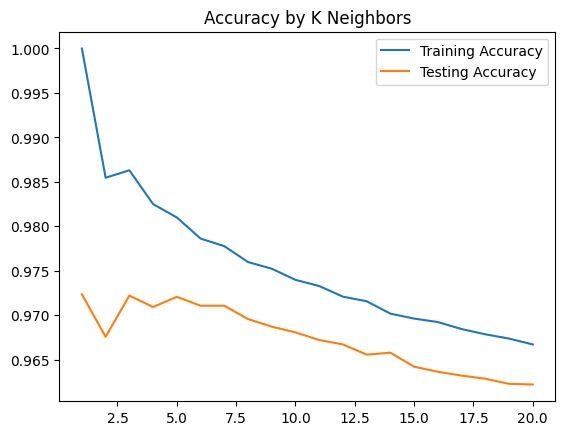

In [41]:
plt.title("Accuracy by K Neighbors")
plt.plot(k, training_acc, label="Training Accuracy")
plt.plot(k, testing_acc, label="Testing Accuracy")
plt.legend(loc="upper right")
plt.show()

Using a `k` value of 3 appears to be optimal, as it performs the best on the testing data.

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

In [42]:
# Use the best model available.
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

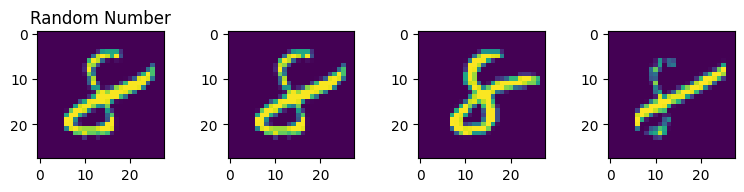

In [57]:
# Pick random image.
image_index = np.random.randint(0, len(X))
image = X[image_index]
image_display = np.reshape(image, (28, 28))

# Get its closest neighbors.
neigh_dist, neigh_ind = neigh.kneighbors(image.reshape(1, -1))
neigh_ind = neigh_ind[0]

# Plot image.
plt.figure(figsize=(9,6))
plt.subplot(1,4,1)
plt.imshow(image_display)
plt.title(f'Random Number')

# Plot k nearest neighbors.
for i in range(len(neigh_ind)):
    plt.subplot(1, 4, 2 + i)
    
    ind = neigh_ind[i]
    neigh_img = X_train[ind]
    plt.imshow(np.reshape(neigh_img, (28, 28)))

_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

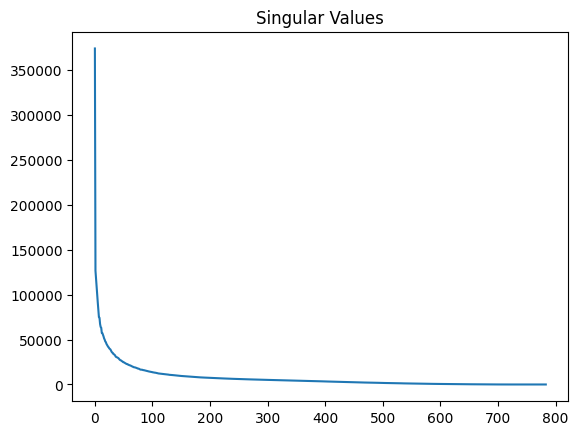

In [142]:
# Perform dimensionality reduction using SVD.
# Perform SVD on the entire dataset.
u,s,vt=np.linalg.svd(X_train,full_matrices=False)

# Plot its singular values.
plt.plot(s)
plt.title("Singular Values")
plt.show()

In [145]:
# Obtain approximated testing dataset.
scopy = s.copy()
scopy[100:] = 0.0
X_train_approx = u.dot(np.diag(scopy)).dot(vt)

In [146]:
# Repeat experiment with approximated dataset.
# Collect data from running on values of K.
k = [i for i in range(1, 21)]
training_acc = []
testing_acc = []

for i in k:
    print("Training ", i)
    # Train on a value of k.
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_approx, y_train)
    
    print("Testing ", i)
    # Calculate accuracy for both training and testing set.
    training_acc.append(neigh.score(X_train_approx, y_train))
    testing_acc.append(neigh.score(X_test, y_test))    

Training  1
Testing  1
Training  2
Testing  2
Training  3
Testing  3
Training  4
Testing  4
Training  5
Testing  5
Training  6
Testing  6
Training  7
Testing  7
Training  8
Testing  8
Training  9
Testing  9
Training  10
Testing  10
Training  11
Testing  11
Training  12
Testing  12
Training  13
Testing  13
Training  14
Testing  14
Training  15
Testing  15
Training  16
Testing  16
Training  17
Testing  17
Training  18
Testing  18
Training  19
Testing  19
Training  20
Testing  20


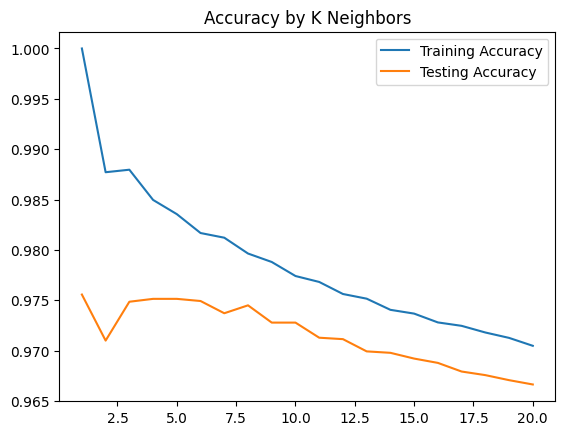

In [147]:
plt.title("Accuracy by K Neighbors")
plt.plot(k, training_acc, label="Training Accuracy")
plt.plot(k, testing_acc, label="Testing Accuracy")
plt.legend(loc="upper right")
plt.show()

By considering the graph of its singular values, we can observe that there are hugely diminishing returns after 100 singular values. Hence, we can just consider the first 100.

While the shapes of the graphs remain the same, we can observe that the accuracy has increased when using the dataset with reduced dimensionality. This is likely because by reducing the dimensionality of our data, we have eliminated noise which was interfering with the model previously, resulting in a more accurate model.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

#### Features Added
One new feature that I extracted was the title from their names, as we had done in worksheet 2. While names might not be a good indicator of who survives inherently, their titles might provide some insight as to the relationship between those who survived and their given title.

Another feature is to consider the family size as a whole instead of separating it into siblings / spouses and parents. The reasoning here is that we want to consider the relationship between having family aboard and having survived. The distinction between who the family is is unlikely to matter much.

#### K Chosen
From our previous experiements, it appears that a value of `k` is optimal to avoid both underfitting and overfitting.

After we have made these decisions, we can run the `KNeighborsClassifier` imported from `sklearn` and return the predictions to submit to Kaggle.

## Username for Submission
`kbbtan`

In [59]:
# Imports
import pandas as pd

In [119]:
# Read data from the training set.
df = pd.read_csv("train.csv")

In [120]:
# Add new title column, with rest of the name fields.
def split_names(row):
    """ This function is applied row wise to the dataframe in order to extract fields from
        the name column.
    """
    values = row["Name"].split()
    name_fields = [None, None, None, None]
    
    # Extract different name portions from Name column.
    if len(values) >= 4:
        name_fields[1] = values[3]
        
    if len(values) >= 3:
        name_fields[0] = values[2]
        
    if len(values) >= 2:
        name_fields[3] = values[1][:-1]
        
    if len(values) >= 1:
        name_fields[2] = values[0][:-1]
    
    return name_fields

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df.apply(split_names, axis=1, result_type="expand")

# Add new family_size column, which is just the sum of siblings / spouses / parents / children.
df["family_size"] = df["SibSp"] + df["Parch"]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Middle Name,Last Name,Title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen,Harris,Braund,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,John,Bradley,Cumings,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,None,Heikkinen,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jacques,Heath,Futrelle,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,William,Henry,Allen,Mr,0


In [122]:
# Create a model and train it on the data given.

# Extract the survived column as the classifier.
y = df["Survived"]

# Remove it from our X.
X = df.drop("Survived", axis=1)

# We can also drop the name attributes, sibSp and Parch as we consider these with our new features.
X = X.drop("Name", axis=1)
X = X.drop("First Name", axis=1)
X = X.drop("Middle Name", axis=1)
X = X.drop("Last Name", axis=1)
X = X.drop("SibSp", axis=1)
X = X.drop("Parch", axis=1)

# Drop some features to speed up processing time.
X = X.drop("Ticket", axis=1)
X = X.drop("Cabin", axis=1)
X = X.drop("Fare", axis=1)
X = X.drop("Age", axis=1)

# Replace Sex column with integers representing male and female.
X["Sex"] = X["Sex"].replace("male", "0")
X["Sex"] = X["Sex"].replace("female", "1")
X["Sex"] = X["Sex"].astype(int)

# Replace Embarked column with integers representing the different ports.
# If the port is null, assume that it is from Q.
X["Embarked"] = X["Embarked"].fillna("Q")
X["Embarked"] = X["Embarked"].replace("C", "0")
X["Embarked"] = X["Embarked"].replace("Q", "1")
X["Embarked"] = X["Embarked"].replace("S", "2")
X["Embarked"] = X["Embarked"].astype(int)

# Replace Title with integers representing the different titles.
titles = X["Title"].unique()
for title in titles:
    X["Title"] = X["Title"].replace(title, np.where(titles==title)[0][0])
X["Title"] = X["Title"].astype(int)


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [136]:
# Get predictions for each passengerid.
def get_prediction(row):
    return neigh.predict(np.array(row).reshape(1, -1))[0]

# Read test data.
test = pd.read_csv("test.csv")

# Extract all the fields needed for predictions (same as what we did to X)
test[['First Name', 'Middle Name', 'Last Name', 'Title']] = test.apply(split_names, axis=1, result_type="expand")
test["family_size"] = test["SibSp"] + test["Parch"]
test = test.drop("Name", axis=1)
test = test.drop("First Name", axis=1)
test = test.drop("Middle Name", axis=1)
test = test.drop("Last Name", axis=1)
test = test.drop("SibSp", axis=1)
test = test.drop("Parch", axis=1)
test = test.drop("Ticket", axis=1)
test = test.drop("Cabin", axis=1)
test = test.drop("Fare", axis=1)
test = test.drop("Age", axis=1)
test["Sex"] = test["Sex"].replace("male", "0")
test["Sex"] = test["Sex"].replace("female", "1")
test["Sex"] = test["Sex"].astype(int)
test["Embarked"] = test["Embarked"].fillna("Q")
test["Embarked"] = test["Embarked"].replace("C", "0")
test["Embarked"] = test["Embarked"].replace("Q", "1")
test["Embarked"] = test["Embarked"].replace("S", "2")
test["Embarked"] = test["Embarked"].astype(int)
titles = test["Title"].unique()
for title in titles:
    test["Title"] = test["Title"].replace(title, np.where(titles==title)[0][0])
test["Title"] = test["Title"].astype(int)

test["Prediction"] = test.apply(get_prediction, axis=1)

C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitte

C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitte

In [138]:
# Extract the fields for output.
out = test[["PassengerId", "Prediction"]]
out = out.rename(columns={"Prediction": "Survived"})
out.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [139]:
out.to_csv("predictions.csv", index=False)